In [1]:
# Overview of progress ( google API by country)  of vaccination (VS Death rate ) top 25 countries & Australia


In [2]:
#dependencies 
import pandas as pd 
import matplotlib.pyplot as plt 
from config import gkey
import requests
import json 
import gmaps
from matplotlib.ticker import FuncFormatter


In [3]:
# read csv file with vaccination data  and convert to dataframe 
file="Resources/country vaccinations.csv"
vacc=pd.read_csv(file)

#groupby country and get percentage of fully vacc & firstdose per hundred 
# as data gets updated as per time, hence the max will be the latest vaccination rate per hundred 
firstdose=vacc.groupby('country')['people_vaccinated_per_hundred'].max()
fully_vacc=vacc.groupby('country')['people_fully_vaccinated_per_hundred'].max()

#create new dataframe with vacc progress (first, fully, not vacc )
vacc_details=pd.DataFrame({"First Dose": round(firstdose/100,2),
                           "Fully Vaccinated": round(fully_vacc/100,2),
                           "Not Vaccinated":""})

# clean data by dropping n/a and remove people vaccinated>100 per hundred (invalid data)
#df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]
vacc_clean=vacc_details.loc[vacc_details['First Dose']<=100].dropna()

# calculate value of people not vaccinated and update df (100-people receive first dose)
vacc_clean['Not Vaccinated']=1-vacc_clean['First Dose']
vacc_progress=vacc_clean.sample(n=24)


Text(0.5, 1.0, 'Overview Worldwide Vaccination Progress (%)')

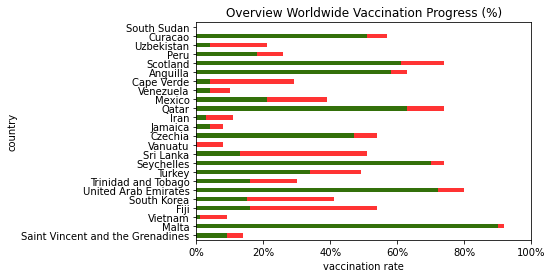

In [4]:
# plotting stack bar chart 
ax=vacc_progress['First Dose'].plot(kind='barh', color='red', width=.5, alpha=0.8)
vacc_progress['Fully Vaccinated'].plot(kind='barh', color='green', width=.5, alpha=0.8)
#setting range of x axis and format it as % 
ax.set_xlim(0, 1)
ax.xaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
#adding labels 
ax.set_xlabel('vaccination rate')
ax.set_ylabel('country')
ax.set_title('Overview Worldwide Vaccination Progress (%)')

In [5]:
#getting geo data 
file2="Resources/country-capitals.csv"
geo=pd.read_csv(file2)
#only need contry, capital, lat and lng details, rename country so we can merge with vacc data 
geo=geo.rename(columns={"CountryName": "country","CapitalName": "Capital","CapitalLatitude": "Latitude", "CapitalLongitude": "Longtitude"})
geo_cut=geo[geo.columns[0:4]]

#merge data on country name 
vacc_geo=pd.merge(vacc_clean, geo_cut, how="left", on=['country']).dropna()
vacc_geo.head()

,country,First Dose,Fully Vaccinated,Not Vaccinated,Capital,Latitude,Longtitude
0,Afghanistan,0.02,0.01,0.98,Kabul,34.516667,69.183333
1,Albania,0.24,0.19,0.76,Tirana,41.316667,19.816667
2,Algeria,0.08,0.02,0.92,Algiers,36.750000,3.050000
3,Andorra,0.63,0.44,0.37,Andorra la Vella,42.500000,1.516667
4,Angola,0.03,0.02,0.97,Luanda,-8.833333,13.216667


In [6]:

#config gmaps 
gmaps.configure(api_key=gkey)

#Store latitude and longitude in locations
locations=vacc_geo[['Latitude', 'Longtitude']]

#plot heatmap 
fig=gmaps.figure()

#first dose as weights 
first_dose_rate=vacc_geo['First Dose']

#create a layer 
rate_layer=gmaps.heatmap_layer(locations, weights=first_dose_rate, max_intensity=1, dissipating=False, point_radius=1.5)

#add layer 
fig.add_layer(rate_layer)

#display
fig

Figure(layout=FigureLayout(height='420px'))

In [8]:
countries_string = requests.get("https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json").content
countries = json.loads(countries_string)
#config gmaps 
gmaps.configure(api_key=gkey)

fig=gmaps.figure()
geojson = gmaps.geojson_layer(countries)
fig.add_layer(geojson)
fig




Figure(layout=FigureLayout(height='420px'))